# Probablity distributions

In [70]:
import numpy as np 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,6)
import matplotlib.pyplot as plt

### Contents of this notebook

Contributed by: Sharan Banagiri

Text and Exercises borrowed from: https://www.dataquest.io/blog/basic-statistics-in-python-probability/

* Some useful probability distributions

    * Univariate Gaussian
    * Multivariate Gaussian
    * Poisson
    * $\chi$^2 distribution
    * Binomial

    
* Central limit theorem

### Discrete Distributions - Warm Up

To calculate the chance of an event happening, we also need to consider all the other events that can occur. The quintessential representation of probability is the humble coin toss. In a coin toss the only events that can happen are:

   * Flipping a heads
   * Flipping a tails

These two events form the sample space, the set of all possible events that can happen. To calculate the probability of an event occurring, we count how many times are event of interest can occur (say flipping heads) and dividing it by the sample space. Thus, probability will tell us that an ideal coin will have a 1-in-2 chance of being heads or tails. By looking at the events that can occur, probability gives us a framework for making predictions about how often events will happen. However, even though it seems obvious, if we actually try to toss some coins, we’re likely to get an abnormally high or low counts of heads every once in a while. If we don’t want to make the assumption that the coin is fair, what can we do? We can gather data! We can use statistics to calculate probabilities based on observations from the real world and check how it compares to the ideal.

In [4]:
import random

def coin_trial():
    heads = 0
    for i in range(100):
        if random.random() <= 0.5:
            heads +=1
    return heads

def simulate(n):
    trials = []
    for i in range(n):
        trials.append(coin_trial())
    return(sum(trials)/n)

simulate(1000)

49.895

The data confirm that our average number of heads does approach what probability suggests it should be. Furthermore, this average improves with more trials. In 10 trials, there’s some slight error, but this error almost disappears entirely with 1,000,000 trials. As we get more trials, the deviation away from the average decreases. Sound familiar? Sure, we could have flipped the coin ourselves, but Python saves us a lot of time by allowing us to model this process in code. As we get more and more data, the real-world starts to resemble the ideal.



### Discrete Distributions - Exercise

A box contains 10 white balls, 20 reds and 30 greens. Draw 5 balls with replacement… what is the probability that
   * 3 white or 2 red
   * All 5 are the same color

In [6]:
# your code here...
import numpy as np
n_simulations = 100
for i in range(n_simulations):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


### Univariate Gaussian

The first distribution of interest is the **Gaussian** or the **Normal** distribution. We will come across the Gaussian distribution often, especially because of the central limit theorem. Lets start with the Univariate Gaussian. If a random variable x is distributed as a Gaussian, its probability distribution function is 

$$ p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \, \exp \left (- \frac{1}{2} \frac{(x - \mu)^2}{\sigma^2} \right) $$

We just have two moments to worry about this the mean and the variance. All other higher moments turn out to be zero

$$E(x) = \mu$$
$$E((x - E(x))^2) = \sigma^2$$



To generate random data from those distributions, we will use the numpy random generator with a seed for reproducibility.   

In [47]:
from numpy.random import default_rng
rg = default_rng(121)


Lets draw 200 samples from this a unit Gaussian with $\mu = 0, \sigma^2 = 1$. The law of large numbers allows us to estimate the mean and the variance of the Gaussian using the mean and the variance of the samples. Usually when doing data analysis we can only get samples from a probability distribution that we want to study, and the law of large numbers allows us to study the distribution using the samples.  

In [48]:
N = 1000

# Draw samples from a random number generator with a fixed seed 
# from a Gaussian with mu = 0, sigma = 1 
stdn_samples = rg.standard_normal(N)

# The estimate of the mean and the variance
mu_estimate = np.sum(stdn_samples)/N
var_estimate = np.sum((stdn_samples - mu_estimate)**2) / N

print('The estimate of the mean from the samples is ' + str(mu_estimate))
print('The estimate of the variance from the samples is ' + str(var_estimate)) 

The estimate of the mean from the samples is -0.04342800207180963
The estimate of the variance from the samples is 1.0146530995252203


Lets plot the samples with seaborn

<AxesSubplot:>

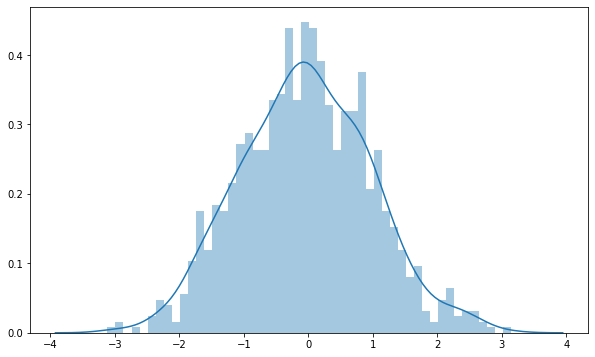

In [71]:
import seaborn as sns

sns.distplot(stdn_samples, bins=50)

The normal distribution with mean $\mu$ and variance $\sigma^2$ is often written as $\mathcal{N}(\mu, \sigma^2)$. A nice thing about Gaussians is that these can be scaled from the standard normal gaussian

$$\mathcal{N}(\mu, \sigma^2) = \sigma \mathcal{N}(0, 1) + \mu$$

In [50]:
# Lets do this with the standard gaussian samples we created earlier to 
# get samples from a distribution with mu = -1 and sigma = 3 

mu, sigma = -1, 3

new_gaussian_samples = sigma * stdn_samples + mu

# Now estimate of the mean and the variance to see if it worked
new_mu_estimate = np.sum(new_gaussian_samples)/N
new_var_estimate = np.sum((new_gaussian_samples - new_mu_estimate)**2) / N

print('The estimate of the mean from the samples is ' + str(new_mu_estimate))
print('The estimate of the variance from the samples is ' + str(new_var_estimate)) 

The estimate of the mean from the samples is -1.130284006215429
The estimate of the variance from the samples is 9.131877895726982


### Multivariate Gaussian

Next up is the multivariate version of the Gaussian distribution. If an N-dimensional vector of random variables $\bar{X}$ is distributed as a multivariate Gaussian its probability distribution function is. 

$$ p(\bar{X}) = \frac{1}{(2 \pi |C|)^{N/2}} \, \exp\left[- \frac{1}{2} (\bar{X} - \bar{\mu})^T C^{-1} (\bar{X} - \bar{\mu})  \right] $$


$\mu$ is the vector of means. Its $i-th$ element is the mean of the corresponding element of the data vector $\mu_i = E \left(X_i \right)$

$C$ is the $N \times N$ covariance matrix whose elements are given by $C_{ij} = E \left[(X_i - \mu_i)(X_j - \mu_j) \right]$. The non-diagonal elements of matrix describe how the fluctuations of one of the data series are connected that of the others. This is the crux, a multivariate Gaussian is not just a set of N univariate Gaussians but also describes how they are connected together. 

Notice that $C$ is a symmetric matric by definition $C_{ij} = C_{ji}$

Looking at the two-dimensional case is the useful. Lets do that below. 

In [133]:
# lets define a mean and the covariance matrix for our 2D gaussian. 
mu = np.array([3.0, -2.0])

C  = np.array([[0.75, 0.5], [0.5, 1]])

# np has a multivariate_normal method to draw samples
multi_samples = rg.multivariate_normal(mu, C, size=N)

# Lets check if this worked by calculating the estimators
# First the means
mu1 = np.sum(multi_samples[:, 0])/N
mu2 = np.sum(multi_samples[:, 1])/N

# Now the elements of the covaraiance matrix
C11 = np.sum((multi_samples[:, 0] - mu1) * (multi_samples[:, 0] - mu2))/N
C22 = np.sum((multi_samples[:, 1] - mu1) * (multi_samples[:, 1] - mu2))/N
C12 = np.sum((multi_samples[:, 0] - mu1) * (multi_samples[:, 1] - mu2))/N


print('The estimate of the two means from the samples is mu = ' + str([mu1, mu2]) )
print('The estimate of the variance of the samples is [C11, C22] = ' + str([C11, C22])) 
print('The estimate of the covariance of the samples is C12 = ' + str(C12)) 

The estimate of the two means from the samples is mu = [2.9639387631977914, -2.0379141225087087]
The estimate of the variance of the samples is [C11, C22] = [0.7356317060710083, 1.044635011729454]
The estimate of the covariance of the samples is C12 = 0.513911706392749


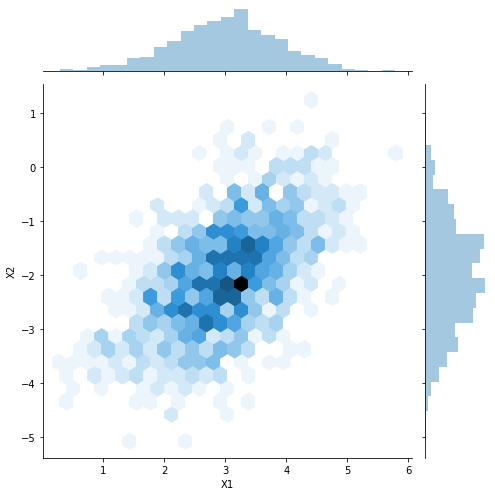

In [80]:
# lets plot the multivariate data. First we will make a pandas dataframe
import pandas as pd

multi = { 'X1':[], 'X2':[] }

multi['X1'], multi['X2'] = multi_samples[:, 0], multi_samples[:, 1]
    
multi_pd = pd.DataFrame(multi)



# Lets plot this with seaborn's joinplot
sns.jointplot('X1', 'X2', multi_pd, kind='hex', height=7)

### Complex normal
At this point we should note that all the discussion has been about Gaussian distributions of real variables. Often we want to study complex Gaussian variables. This is often the case when we want to analyze data in Fourier space or upon a Fourier transform. 

The variable $z = x + iy$ is defined as a complex normal variable if both the real and imaginary parts of it are distributed as independent (real) normal variables. Suppose 

$$\mu = E(x) + i E(y)$$ and 

$$\sigma^2 = E\left((x - E(x))^2\right) + E\left((y - E(y))^2\right) $$

Then the univariate complex normal distribution is the product of the distributions of the real and complex parts

$$P(z) = \frac{1}{2 \pi \sigma^2} \, \exp \left (-  \frac{|z - \mu|^2}{\sigma^2} \right)$$


### $\chi^2$ distribution

Next up is the $\chi^2$ distribution. Suppose we have $N$ standard normal variables $x_1, x_2, ..., x_N$, then the sum of squares 

$$X^2_N = \sum_i^N x^2_i \sim \chi^2_N$$

will follow a $\chi^2$ distribution with N degrees of freedom. The mean of the $\chi^2$ distribution is $N$ and the variance is $2N$

In [150]:
# Lets create three sets of standard Gaussian data. 
x1, x2, x3 = rg.standard_normal(N), rg.standard_normal(N), rg.standard_normal(N)

# Now the data distributed as 
X2 = x1**2 + x2**2 + x3**2

# Lets find the mean and std deviation.
# we should 3 and 6 respectively. 
mu = np.sum(X2)/N
var = np.sum((X2 - mu)**2)/N

print('The estimate of the mean is ' + str(mu))
print('The estimate of the variance is ' + str(var)) 

The estimate of the mean is 3.009382318909581
The estimate of the variance is 6.0730124417660685


The $\chi^2$ distribution also forms the basis of the $\chi^2$ test which is a common goodness of fit test. We will get back to this as we step through the notebook

### Poisson distribution

Next up is the Poisson distribution. Its pretty important for us physicists and astronomers because it has to do with the statistics of counting. Poisson statistics can be used to model the statistics of decay of radioactive elements, or the number of supernova and blackhole mergers in the universe. Its not just fluctuations in time. For example if we divide the sky into pixels and count the number of galaxies in each pixel we should expect to find that they are distributed according to Poisson statistics too. 

Given $n$ events we can write the Poisson probability distribution as

$$P(n) = \frac{\lambda^n e^{-\lambda}}{n!}$$

where $\lambda$ is the average number of events. Notice that while $n$ has to be an integer $\lambda$ just needs to be a non-negative real number. 

The mean of the Poisson is $E(n) = \lambda$
The variance is $\lambda$ too $E\left( (n - \lambda)^2 \right) = \lambda$

In [89]:
N = 2000

# Draw samples from a random number generator with a fixed seed 
# from a Gaussian with mu = 0, sigma = 1 
poisson_samples = rg.poisson(lam=3, size=N)

# The estimate of the mean and the variance
mu_estimate = np.sum(poisson_samples)/N
var_estimate = np.sum((poisson_samples - mu_estimate)**2) / N

print('The estimate of the mean from the Poisson samples is ' + str(mu_estimate))
print('The estimate of the variance from the Poisson samples is ' + str(var_estimate)) 

The estimate of the mean from the Poisson samples is 3.029
The estimate of the variance from the Poisson samples is 3.1251590000000005


<AxesSubplot:>

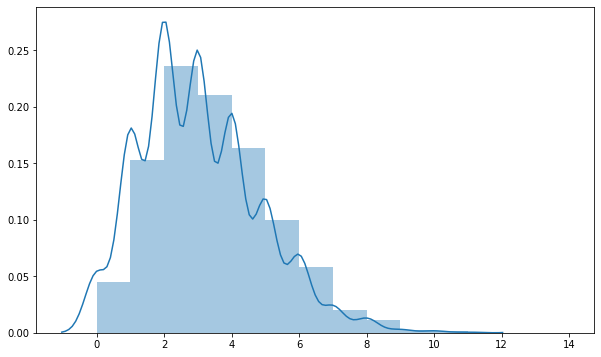

In [93]:
# lets plot
sns.distplot(poisson_samples, bins=np.arange(15))

### Binomial distribution

The binomial distribution follows from the binomial theorem and describes the probability distribution of binary events like coin tosses. For example what is the probability of getting 48 heads on tossing a coin 100 times? The answer is given by the binomial distribution 

$$P(k) = {N\choose k} p^k (1-p)^k$$

the probability of getting k heads with N tosses, with p is the probability of getting heads (0.5 for a fair coin)

The mean or the expectation value of N tosses is given by $E(k) = Np$

In [113]:
N = 1000

# Lets draw 1000 samples from the binomial distribution. Numpy again has a convenient inbuilt method. 
# Each sample is either 0 or 1. The probability of getting a success i.e drawing 1 in a toss is 0.7
bin_samples = rg.binomial(1, 0.7, size=N)

# We can estimate p by using the expectation value. 

p_estimate = bin_samples.sum()/N

print('The estimate of p is ' + str(p_estimate))

The estimate of p is 0.698


<AxesSubplot:>

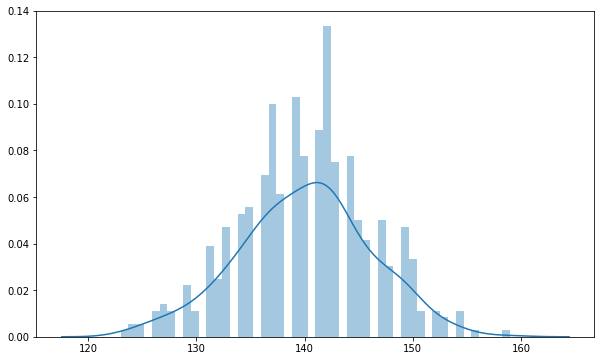

In [118]:
# Now lets make 1000 seperate estimates of 200 draws. The binomial methods now gives us the sum 1000 draws each time. 
bin_samples2 = rg.binomial(200, 0.7, size=N)

# lets make a histogram. It should peak around 0.7*200 = 140
sns.distplot(bin_samples2, bins=50)

### Central limit theorem

The last topic in this notebook is the powerful central limit theorem. Let $x_i, i = (1, 2, ..., N)$ be random variables then in the limit $N \to \infty$ the sum $X = \sum_i X_i$ is a **Gaussian** random variable with mean $\mu = \sum_i \mu_i$ and variance $\sigma^2 = \sum_i \sigma^2_i$. This works for almost any random variable and is of central important in many applications. For example in gravitational-wave data analysis the instrumental noise in the frequency domain is treated as a Gaussian random variable. This is justified by the fact that the instrumental noise is the sum of noises which originate from several independent sources which "add in quadrature" and generate Gaussian random noise by virtue of the central limit theorem.  

Even though the theorem says it works in the limit $N \to \infty$ in practice it usually works pretty well for even small N if we just want to measure things like the mean. 

In [247]:
# For this notebook we will just test that the central limit theorem works.
# Lets define and draw 1000 samples from 4 poisson distribution and 4 gaussian
# distributions. 

N = 2000

x1 = rg.poisson(lam=1, size=N)
x2 = rg.poisson(lam=2, size=N)
x3 = rg.poisson(lam=3, size=N)
x4 = rg.poisson(lam=4, size=N)
x5 = 2* rg.standard_normal(N) + 1
x6 = 1 * rg.standard_normal(N) - 2
x7 = 2* rg.standard_normal(N) - 1
x8 = 1.5* rg.standard_normal(N) 


# Lets now define the sum
X = x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8

# According to the central limit theorem the sum should have a mean 
# of 1+2+3+4+1-2-1 = 8 and variance  = 21.5. Letc check if that is the case

# The estimate of the mean and the variance
mu_estimate = np.sum(X)/N
var_estimate = np.sum((X - mu_estimate)**2) / N

print('The estimate of the mean from the samples is ' + str(mu_estimate))
print('The estimate of the variance from the samples is ' + str(var_estimate)) 

The estimate of the mean from the samples is 7.94063118287095
The estimate of the variance from the samples is 22.64732822170186


The mean and the variance do indeed seem to checkout. But note again that we have added only a small number of distributions. If you plot histograms you will see a difference between the Gaussian and and the data. 